In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
singles = pd.read_hdf("singles_230801.h5")
singles.head()

,NAME,OLD_SPT,WAVE,FLUX,UNCERTAINTY,J_SNR,MKO_J,MKO_H,MKO_K,2MASS_J,2MASS_H,2MASS_KS,SPT
0,2MASS J11304030+1206306,M6.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9660627713093847e-10, 2.1131039893243844e-1...","[5.982245325049133e-12, 5.755711185801827e-12,...",94.018303,10.28,9.756188,9.363207,10.318813,9.706062,9.380460,M6.0
1,GAT 1370,M6.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9950771920752281e-10, 2.079591490944689e-10...","[7.703832533018333e-13, 1.0951267822400711e-12...",386.537811,10.28,9.843838,9.431730,10.327964,9.784580,9.454359,M7.0
2,2MASS J04314644+2506236,M6.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.9762911463072993e-10, 2.0580528498234088e-1...","[2.2989224859548107e-12, 2.3022679333025286e-1...",204.598099,10.28,9.758637,9.359883,10.321691,9.701496,9.382371,M6.0
3,2MASS J01405263+0453302,M6.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.2878515319813078e-10, 2.370316420618723e-10...","[6.1214909391048044e-12, 6.136043777530829e-12...",91.589699,10.28,9.767727,9.404947,10.314496,9.720459,9.430291,M6.0
4,V* FW Tau,M6.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.0618668468240422e-10, 2.142866617637176e-10...","[1.0832266058640476e-12, 1.0976881329239517e-1...",414.787994,10.28,9.745862,9.373990,10.321529,9.687609,9.395473,M6.0


In [3]:
singles.dropna().shape #no missing values

(1049, 13)

In [4]:
standards = pd.read_hdf("standards_230801.h5").reset_index(drop = True)
standards.head()

,NAME,SPT,WAVE,FLUX,UNCERTAINTY,J_SNR,MKO_J,MKO_H,MKO_K,2MASS_J,2MASS_H,2MASS_KS
0,Wolf 47,M5.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[6.335858970763201e-10, 6.407552060024735e-10,...","[6.174749861761518e-12, 6.033063547110708e-12,...",337.328003,9.250000,8.725223,8.405778,9.281501,8.683780,8.422115
1,LHS 1375,M6.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[2.1164212769767142e-10, 2.1783089170223314e-1...","[1.88434457693849e-12, 2.0135316233629004e-12,...",196.461166,10.280000,9.765880,9.378366,10.318862,9.717622,9.396670
2,VB 8,M7.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[1.372959655772379e-10, 1.428143063324856e-10,...","[5.9692609153231e-13, 6.063794446734808e-13, 6...",572.586731,10.593666,10.133086,9.725818,10.639969,10.080488,9.743243
3,VB 10,M8.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[7.234550703618362e-11, 7.634547468658174e-11,...","[3.872360279446258e-13, 3.9600454928403235e-13...",528.510681,10.988594,10.446856,9.960890,11.033639,10.387670,9.978103
4,LHS 2924,M9.0,"[0.90129393, 0.9047135, 0.9081512, 0.9116069, ...","[4.154957755161757e-11, 4.393306217053341e-11,...","[3.026110914887634e-13, 3.169087891092728e-13,...",367.040649,11.308431,10.689916,10.103566,11.345186,10.624095,10.120251


In [5]:
wavegrid = pd.read_csv("wavegrid_230801.csv", header = None)
wavegrid

,0
0,0.901294
1,0.904714
2,0.908151
3,0.911607
4,0.915080
...,...
404,2.387928
405,2.390722
406,2.393512
407,2.396298


In [6]:
first_wavelength = list(singles['WAVE'][0])
# print(len(wavelengths))

wavelength_arr_list = singles['WAVE'].apply(lambda x: list(x) == first_wavelength)
# singles[!= wavelengths]

In [7]:
sum(wavelength_arr_list) #all wavelengths ranges are the same

1049

In [8]:
len(first_wavelength)

409

In [9]:
flux_vals = pd.DataFrame(singles['FLUX'].to_list(), columns=[f'FLUX_{i}' for i in range(409)])
flux_vals

,FLUX_0,FLUX_1,FLUX_2,FLUX_3,FLUX_4,FLUX_5,FLUX_6,FLUX_7,FLUX_8,FLUX_9,...,FLUX_399,FLUX_400,FLUX_401,FLUX_402,FLUX_403,FLUX_404,FLUX_405,FLUX_406,FLUX_407,FLUX_408
0,1.966063e-10,2.113104e-10,2.215433e-10,2.269169e-10,2.322451e-10,2.340153e-10,2.264532e-10,2.183886e-10,2.115621e-10,2.069354e-10,...,5.567336e-11,5.740236e-11,5.390640e-11,5.251170e-11,5.513286e-11,5.493691e-11,5.639457e-11,5.432719e-11,5.391179e-11,5.327284e-11
1,1.995077e-10,2.079591e-10,2.186989e-10,2.314572e-10,2.396579e-10,2.406922e-10,2.316760e-10,2.244714e-10,2.172734e-10,2.145852e-10,...,5.591276e-11,5.510603e-11,5.385560e-11,5.270259e-11,5.162297e-11,5.110227e-11,5.155890e-11,5.132251e-11,5.090229e-11,4.999533e-11
2,1.976291e-10,2.058053e-10,2.110781e-10,2.208615e-10,2.230184e-10,2.221202e-10,2.202383e-10,2.149109e-10,2.121254e-10,2.125676e-10,...,6.030007e-11,5.930177e-11,5.825345e-11,5.708731e-11,5.563603e-11,5.537576e-11,5.549699e-11,5.508036e-11,5.505448e-11,5.516143e-11
3,2.287852e-10,2.370316e-10,2.375884e-10,2.509034e-10,2.579899e-10,2.514759e-10,2.553226e-10,2.390649e-10,2.428736e-10,2.483194e-10,...,5.932869e-11,5.623817e-11,5.618077e-11,5.312362e-11,5.069763e-11,5.341758e-11,5.426651e-11,5.488549e-11,5.353450e-11,5.553981e-11
4,2.061867e-10,2.142867e-10,2.222571e-10,2.337803e-10,2.400063e-10,2.379782e-10,2.291644e-10,2.187137e-10,2.130538e-10,2.069773e-10,...,5.953048e-11,5.892096e-11,5.671666e-11,5.483825e-11,5.366042e-11,5.395389e-11,5.447250e-11,5.488026e-11,5.409111e-11,5.382424e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,2.313982e-13,1.246238e-13,8.972974e-14,4.265471e-13,2.866291e-13,6.806472e-14,1.484016e-13,1.241821e-13,1.547150e-13,7.454638e-14,...,1.082682e-13,3.206458e-14,2.926112e-14,7.741085e-14,-7.055257e-15,6.313737e-14,1.196562e-14,1.701113e-13,-1.241861e-14,7.041690e-14
1045,5.244854e-14,6.580744e-14,7.174799e-14,9.208437e-14,9.605482e-14,8.874525e-14,8.907351e-14,9.499554e-14,7.442492e-14,4.500412e-14,...,1.211383e-14,1.618761e-14,1.507172e-14,-1.219934e-15,-1.141334e-14,-4.224110e-15,1.857852e-15,1.312781e-15,2.107446e-15,1.078067e-14
1046,-2.261458e-14,5.872130e-14,8.086862e-14,1.363968e-13,9.682284e-14,6.840073e-14,7.941230e-14,3.186888e-14,4.647245e-14,1.493484e-13,...,-2.968672e-15,6.305976e-15,-1.670164e-14,-6.519861e-15,-9.100989e-15,-2.203045e-14,-8.750551e-15,-1.361205e-14,-1.478014e-14,4.460326e-15
1047,1.467886e-14,1.789743e-14,1.684622e-14,2.291370e-14,2.739319e-14,2.837789e-14,2.727773e-14,2.391738e-14,1.773882e-14,1.119925e-14,...,2.671819e-16,-4.450959e-16,-2.573074e-15,-1.456679e-15,-3.909625e-15,-6.703809e-16,-2.492077e-16,-5.122546e-17,-2.611775e-16,2.406627e-15


In [10]:
uncertainties = pd.DataFrame(singles['UNCERTAINTY'].to_list(), columns=[f'UNCERTAINTY_{i}' for i in range(409)])
uncertainties

,UNCERTAINTY_0,UNCERTAINTY_1,UNCERTAINTY_2,UNCERTAINTY_3,UNCERTAINTY_4,UNCERTAINTY_5,UNCERTAINTY_6,UNCERTAINTY_7,UNCERTAINTY_8,UNCERTAINTY_9,...,UNCERTAINTY_399,UNCERTAINTY_400,UNCERTAINTY_401,UNCERTAINTY_402,UNCERTAINTY_403,UNCERTAINTY_404,UNCERTAINTY_405,UNCERTAINTY_406,UNCERTAINTY_407,UNCERTAINTY_408
0,5.982245e-12,5.755711e-12,5.774994e-12,5.743433e-12,5.707030e-12,5.540721e-12,5.392075e-12,5.317957e-12,5.472278e-12,5.780100e-12,...,2.448598e-12,2.413806e-12,2.384130e-12,2.396053e-12,2.423630e-12,2.463768e-12,2.460030e-12,2.422477e-12,2.397301e-12,2.400054e-12
1,7.703833e-13,1.095127e-12,8.092698e-13,6.645292e-13,8.406512e-13,1.188317e-12,1.478707e-12,2.343772e-12,1.611238e-12,1.496147e-12,...,2.312284e-13,1.168747e-13,2.018983e-13,2.025986e-13,1.947078e-13,2.213379e-13,1.561051e-13,1.705617e-13,9.501916e-14,1.626438e-13
2,2.298922e-12,2.302268e-12,2.284552e-12,2.296922e-12,2.285680e-12,2.262626e-12,2.231034e-12,2.241062e-12,2.251618e-12,2.268916e-12,...,6.924510e-13,7.374053e-13,7.397211e-13,7.040103e-13,6.737279e-13,6.612941e-13,6.596897e-13,6.531299e-13,6.516627e-13,6.539687e-13
3,6.121491e-12,6.136044e-12,5.974777e-12,6.099158e-12,5.905010e-12,5.666184e-12,5.621277e-12,5.680469e-12,5.869907e-12,6.283347e-12,...,2.769049e-12,2.582853e-12,2.599686e-12,2.657757e-12,2.712756e-12,2.721215e-12,2.666555e-12,2.678714e-12,2.618755e-12,2.623025e-12
4,1.083227e-12,1.097688e-12,1.084336e-12,1.109852e-12,1.105507e-12,1.093826e-12,1.047879e-12,1.057000e-12,1.072428e-12,1.119213e-12,...,3.360910e-13,3.215716e-13,2.992665e-13,2.920007e-13,2.872128e-13,2.893075e-13,2.883573e-13,2.860035e-13,2.837660e-13,2.798182e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,1.296128e-13,1.252046e-13,1.206426e-13,1.204733e-13,1.151798e-13,1.131374e-13,1.101454e-13,1.174630e-13,1.282283e-13,1.373900e-13,...,8.179791e-14,7.103099e-14,6.644239e-14,6.621374e-14,6.685241e-14,6.790595e-14,6.705552e-14,6.664723e-14,6.562566e-14,6.479051e-14
1045,3.029491e-14,2.968834e-14,2.881846e-14,2.823796e-14,2.751799e-14,2.710523e-14,2.674042e-14,2.781411e-14,2.898309e-14,3.017690e-14,...,1.662635e-14,1.489919e-14,1.418681e-14,1.418128e-14,1.436428e-14,1.450991e-14,1.457573e-14,1.449525e-14,1.433981e-14,1.427286e-14
1046,4.487632e-14,4.616998e-14,4.607191e-14,4.446710e-14,4.389685e-14,4.263876e-14,4.160310e-14,4.212664e-14,4.403179e-14,4.566768e-14,...,1.981817e-14,1.995132e-14,1.708814e-14,1.627414e-14,1.505156e-14,1.423664e-14,1.342334e-14,1.267604e-14,1.175993e-14,1.098708e-14
1047,6.009617e-15,6.170118e-15,6.339106e-15,6.305739e-15,6.056272e-15,6.046692e-15,5.772085e-15,5.649095e-15,5.684177e-15,5.947928e-15,...,3.324004e-15,3.395267e-15,3.347657e-15,3.352179e-15,3.366822e-15,3.415346e-15,3.413950e-15,3.379023e-15,3.313510e-15,3.300075e-15


In [11]:
uncertainties.columns = [f'FLUX_{i}' for i in range(409)]
min_flux = flux_vals - uncertainties
max_flux = flux_vals + uncertainties

In [12]:
min_flux

,FLUX_0,FLUX_1,FLUX_2,FLUX_3,FLUX_4,FLUX_5,FLUX_6,FLUX_7,FLUX_8,FLUX_9,...,FLUX_399,FLUX_400,FLUX_401,FLUX_402,FLUX_403,FLUX_404,FLUX_405,FLUX_406,FLUX_407,FLUX_408
0,1.906240e-10,2.055547e-10,2.157683e-10,2.211735e-10,2.265381e-10,2.284746e-10,2.210612e-10,2.130707e-10,2.060898e-10,2.011553e-10,...,5.322476e-11,5.498855e-11,5.152227e-11,5.011565e-11,5.270923e-11,5.247314e-11,5.393454e-11,5.190471e-11,5.151449e-11,5.087278e-11
1,1.987373e-10,2.068640e-10,2.178896e-10,2.307927e-10,2.388172e-10,2.395039e-10,2.301972e-10,2.221276e-10,2.156622e-10,2.130890e-10,...,5.568153e-11,5.498915e-11,5.365371e-11,5.249999e-11,5.142826e-11,5.088093e-11,5.140280e-11,5.115195e-11,5.080727e-11,4.983269e-11
2,1.953302e-10,2.035030e-10,2.087936e-10,2.185645e-10,2.207327e-10,2.198576e-10,2.180073e-10,2.126698e-10,2.098738e-10,2.102987e-10,...,5.960761e-11,5.856437e-11,5.751373e-11,5.638330e-11,5.496231e-11,5.471447e-11,5.483730e-11,5.442723e-11,5.440282e-11,5.450746e-11
3,2.226637e-10,2.308956e-10,2.316136e-10,2.448043e-10,2.520849e-10,2.458097e-10,2.497013e-10,2.333844e-10,2.370037e-10,2.420360e-10,...,5.655965e-11,5.365532e-11,5.358108e-11,5.046586e-11,4.798487e-11,5.069637e-11,5.159995e-11,5.220678e-11,5.091575e-11,5.291679e-11
4,2.051035e-10,2.131890e-10,2.211727e-10,2.326704e-10,2.389008e-10,2.368844e-10,2.281165e-10,2.176567e-10,2.119814e-10,2.058581e-10,...,5.919439e-11,5.859938e-11,5.641739e-11,5.454625e-11,5.337320e-11,5.366458e-11,5.418415e-11,5.459426e-11,5.380735e-11,5.354442e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,1.017854e-13,-5.808511e-16,-3.091289e-14,3.060739e-13,1.714493e-13,-4.507272e-14,3.825614e-14,6.719071e-15,2.648671e-14,-6.284358e-14,...,2.647028e-14,-3.896641e-14,-3.718127e-14,1.119711e-14,-7.390767e-14,-4.768584e-15,-5.508991e-14,1.034641e-13,-7.804427e-14,5.626391e-15
1045,2.215363e-14,3.611910e-14,4.292953e-14,6.384641e-14,6.853683e-14,6.164001e-14,6.233309e-14,6.718143e-14,4.544183e-14,1.482722e-14,...,-4.512513e-15,1.288424e-15,8.849172e-16,-1.540121e-14,-2.577762e-14,-1.873402e-14,-1.271787e-14,-1.318247e-14,-1.223236e-14,-3.492185e-15
1046,-6.749090e-14,1.255132e-14,3.479671e-14,9.192966e-14,5.292599e-14,2.576196e-14,3.780920e-14,-1.025776e-14,2.440663e-15,1.036807e-13,...,-2.278684e-14,-1.364534e-14,-3.378977e-14,-2.279401e-14,-2.415255e-14,-3.626709e-14,-2.217390e-14,-2.628809e-14,-2.654007e-14,-6.526757e-15
1047,8.669242e-15,1.172731e-14,1.050712e-14,1.660796e-14,2.133692e-14,2.233120e-14,2.150564e-14,1.826829e-14,1.205464e-14,5.251317e-15,...,-3.056822e-15,-3.840363e-15,-5.920730e-15,-4.808858e-15,-7.276447e-15,-4.085727e-15,-3.663158e-15,-3.430248e-15,-3.574688e-15,-8.934481e-16


In [13]:
max_flux

,FLUX_0,FLUX_1,FLUX_2,FLUX_3,FLUX_4,FLUX_5,FLUX_6,FLUX_7,FLUX_8,FLUX_9,...,FLUX_399,FLUX_400,FLUX_401,FLUX_402,FLUX_403,FLUX_404,FLUX_405,FLUX_406,FLUX_407,FLUX_408
0,2.025885e-10,2.170661e-10,2.273183e-10,2.326603e-10,2.379521e-10,2.395561e-10,2.318453e-10,2.237066e-10,2.170344e-10,2.127155e-10,...,5.812196e-11,5.981616e-11,5.629053e-11,5.490775e-11,5.755649e-11,5.740067e-11,5.885460e-11,5.674967e-11,5.630909e-11,5.567289e-11
1,2.002781e-10,2.090543e-10,2.195082e-10,2.321218e-10,2.404985e-10,2.418805e-10,2.331547e-10,2.268152e-10,2.188847e-10,2.160813e-10,...,5.614398e-11,5.522290e-11,5.405750e-11,5.290518e-11,5.181767e-11,5.132361e-11,5.171501e-11,5.149307e-11,5.099731e-11,5.015797e-11
2,1.999280e-10,2.081076e-10,2.133627e-10,2.231584e-10,2.253041e-10,2.243828e-10,2.224694e-10,2.171520e-10,2.143770e-10,2.148365e-10,...,6.099252e-11,6.003918e-11,5.899318e-11,5.779132e-11,5.630976e-11,5.603706e-11,5.615668e-11,5.573349e-11,5.570615e-11,5.581540e-11
3,2.349066e-10,2.431677e-10,2.435632e-10,2.570026e-10,2.638949e-10,2.571421e-10,2.609439e-10,2.447453e-10,2.487435e-10,2.546027e-10,...,6.209774e-11,5.882102e-11,5.878045e-11,5.578137e-11,5.341039e-11,5.613880e-11,5.693306e-11,5.756420e-11,5.615326e-11,5.816284e-11
4,2.072699e-10,2.153843e-10,2.233414e-10,2.348901e-10,2.411118e-10,2.390720e-10,2.302123e-10,2.197707e-10,2.141263e-10,2.080965e-10,...,5.986657e-11,5.924253e-11,5.701592e-11,5.513025e-11,5.394763e-11,5.424319e-11,5.476086e-11,5.516627e-11,5.437488e-11,5.410406e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,3.610110e-13,2.498284e-13,2.103724e-13,5.470204e-13,4.018089e-13,1.812022e-13,2.585470e-13,2.416451e-13,2.829433e-13,2.119363e-13,...,1.900661e-13,1.030956e-13,9.570352e-14,1.436246e-13,5.979715e-14,1.310433e-13,7.902114e-14,2.367586e-13,5.320705e-14,1.352074e-13
1045,8.274345e-14,9.549578e-14,1.005664e-13,1.203223e-13,1.235728e-13,1.158505e-13,1.158139e-13,1.228097e-13,1.034080e-13,7.518102e-14,...,2.874018e-14,3.108680e-14,2.925853e-14,1.296134e-14,2.950944e-15,1.028580e-14,1.643358e-14,1.580803e-14,1.644725e-14,2.505353e-14
1046,2.226174e-14,1.048913e-13,1.269405e-13,1.808639e-13,1.407197e-13,1.110395e-13,1.210154e-13,7.399553e-14,9.050425e-14,1.950161e-13,...,1.684950e-14,2.625729e-14,3.865023e-16,9.754283e-15,5.950576e-15,-7.793816e-15,4.672794e-15,-9.360135e-16,-3.020217e-15,1.544741e-14
1047,2.068848e-14,2.406755e-14,2.318533e-14,2.921944e-14,3.344946e-14,3.442458e-14,3.304982e-14,2.956648e-14,2.342300e-14,1.714717e-14,...,3.591186e-15,2.950171e-15,7.745829e-16,1.895500e-15,-5.428031e-16,2.744965e-15,3.164742e-15,3.327797e-15,3.052333e-15,5.706701e-15


In [14]:
flux_vals.max().max()

2.8619753398110217e-10

In [15]:
uncertainties.max().max()

inf

In [16]:
np.where(uncertainties == np.inf) #two rows have infinite uncertainty

(array([1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021,
        1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021,
        1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021,
        1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021,
        1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021, 1021,
        1021, 1028, 1028], dtype=int64),
 array([110, 111, 112, 113, 116, 117, 118, 119, 120, 122, 123, 124, 125,
        126, 127, 128, 131, 132, 236, 237, 239, 240, 243, 244, 341, 342,
        343, 357, 358, 359, 361, 362, 365, 366, 369, 370, 371, 372, 377,
        378, 382, 383, 385, 386, 387, 388, 396, 397, 398, 399, 401, 402,
        403, 404, 405, 406, 399, 400], dtype=int64))

In [17]:
min_flux_val = max_flux.min().min() #min flux value of max fluxes (flux + uncertainty)
min_flux_val

-8.723978414689007e-13

In [18]:
max_flux.max().max()

inf

In [19]:
min_0_max_flux = max_flux - min_flux_val #make minimum value 0
min_0_max_flux.min().min()

0.0

In [20]:
min_0_max_flux.max().max()

inf

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
scaled_flux = scaler.fit_transform(flux_vals)
scaled_flux.shape

(1049, 409)

(array([2.0000e+00, 1.0000e+00, 1.0000e+00, 6.6390e+03, 9.8040e+03,
        1.4581e+04, 1.7424e+04, 1.5286e+04, 2.4124e+04, 2.2653e+04,
        2.2912e+04, 9.5400e+03, 8.5340e+03, 3.7990e+03, 5.7340e+03,
        4.2080e+03, 7.4200e+03, 7.7920e+03, 8.2120e+03, 1.1659e+04,
        1.4707e+04, 1.8441e+04, 1.7153e+04, 1.2774e+04, 8.4610e+03,
        4.7730e+03, 2.8480e+03, 2.0560e+03, 1.5180e+03, 1.9620e+03,
        2.1850e+03, 2.0440e+03, 1.5810e+03, 2.9370e+03, 3.2900e+03,
        3.7440e+03, 4.3240e+03, 4.2550e+03, 4.0900e+03, 4.5460e+03,
        5.1850e+03, 7.7420e+03, 1.2973e+04, 1.5563e+04, 1.0373e+04,
        6.7020e+03, 4.7130e+03, 3.0250e+03, 2.0560e+03, 1.8140e+03,
        1.6400e+03, 1.4760e+03, 1.3380e+03, 1.3600e+03, 1.4260e+03,
        1.8230e+03, 2.1790e+03, 2.6670e+03, 3.5050e+03, 3.6260e+03,
        2.1970e+03, 1.4230e+03, 8.8600e+02, 6.2500e+02, 4.3700e+02,
        3.4100e+02, 3.1800e+02, 4.1900e+02, 4.8600e+02, 5.2900e+02,
        6.7500e+02, 7.5000e+02, 8.1200e+02, 9.56

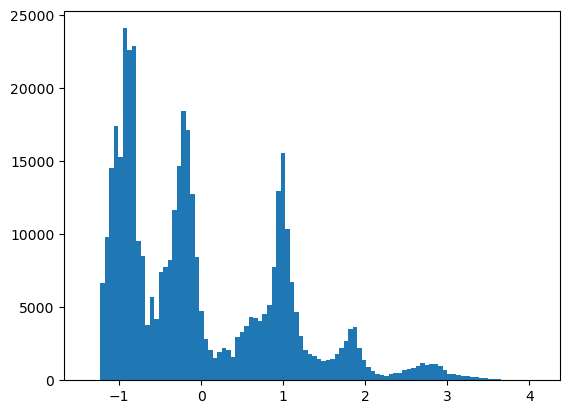

In [23]:
plt.hist(scaled_flux.flatten(), bins = 100)

In [24]:
min_0_flux = flux_vals - flux_vals.min().min()
min_0_flux.min().min()

0.0

In [25]:
min_0_flux.max().max()

2.9473876999444234e-10

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [29]:
singles_drop = singles.drop(columns = ["NAME", "OLD_SPT", "WAVE", "FLUX", "UNCERTAINTY"])
singles_w_flux_vals = pd.concat([singles_drop, flux_vals], axis = 1)
singles_w_flux_vals.head()

,J_SNR,MKO_J,MKO_H,MKO_K,2MASS_J,2MASS_H,2MASS_KS,SPT,FLUX_0,FLUX_1,...,FLUX_399,FLUX_400,FLUX_401,FLUX_402,FLUX_403,FLUX_404,FLUX_405,FLUX_406,FLUX_407,FLUX_408
0,94.018303,10.28,9.756188,9.363207,10.318813,9.706062,9.380460,M6.0,1.966063e-10,2.113104e-10,...,5.567336e-11,5.740236e-11,5.390640e-11,5.251170e-11,5.513286e-11,5.493691e-11,5.639457e-11,5.432719e-11,5.391179e-11,5.327284e-11
1,386.537811,10.28,9.843838,9.431730,10.327964,9.784580,9.454359,M7.0,1.995077e-10,2.079591e-10,...,5.591276e-11,5.510603e-11,5.385560e-11,5.270259e-11,5.162297e-11,5.110227e-11,5.155890e-11,5.132251e-11,5.090229e-11,4.999533e-11
2,204.598099,10.28,9.758637,9.359883,10.321691,9.701496,9.382371,M6.0,1.976291e-10,2.058053e-10,...,6.030007e-11,5.930177e-11,5.825345e-11,5.708731e-11,5.563603e-11,5.537576e-11,5.549699e-11,5.508036e-11,5.505448e-11,5.516143e-11
3,91.589699,10.28,9.767727,9.404947,10.314496,9.720459,9.430291,M6.0,2.287852e-10,2.370316e-10,...,5.932869e-11,5.623817e-11,5.618077e-11,5.312362e-11,5.069763e-11,5.341758e-11,5.426651e-11,5.488549e-11,5.353450e-11,5.553981e-11
4,414.787994,10.28,9.745862,9.373990,10.321529,9.687609,9.395473,M6.0,2.061867e-10,2.142867e-10,...,5.953048e-11,5.892096e-11,5.671666e-11,5.483825e-11,5.366042e-11,5.395389e-11,5.447250e-11,5.488026e-11,5.409111e-11,5.382424e-11


In [33]:
X = singles_w_flux_vals.drop("SPT", axis = 1)
y = singles_w_flux_vals["SPT"]

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
preds = rf_classifier.predict(X_test)
preds[:5]

array(['L1.0', 'T6.0', 'L5.0', 'T6.0', 'M6.0'], dtype=object)

In [40]:
ACC = np.mean(preds == y_test)

print(f"RF ACCURACY: {ACC}")

RF ACCURACY: 0.8031746031746032


## Hyperparameter Tuning (Grid Search)

In [42]:
from sklearn.model_selection import GridSearchCV

In [44]:
y_train.value_counts()

SPT
M8.0    132
L1.0    106
L7.0     53
L6.0     48
L2.0     46
M7.0     39
M9.0     35
L3.0     32
L0.0     31
M6.0     24
T6.0     23
L5.0     23
T5.0     19
T0.0     18
T7.0     17
L4.0     17
L9.0     16
T3.0     13
T1.0     10
T8.0      9
T2.0      9
L8.0      6
T4.0      4
M5.0      3
T9.0      1
Name: count, dtype: int64

In [43]:
rf_parameters = {'n_estimators': [50, 100, 200, 500],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 5, 10],
                 'max_depth' : [5, 7, 9, 10]}

CV_rfc = GridSearchCV(estimator = rf_classifier, param_grid = rf_parameters, scoring = 'accuracy', cv = 5)
CV_rfc.fit(X_train, y_train)

C:\Users\akdec\anaconda3\envs\coolstarlab\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
CV_rfc.best_params_